In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
lend_data=pd.read_csv('lend_data.csv')

In [3]:
lend_data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [4]:
lend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
lend_data.shape

(9578, 14)

In [6]:
lend_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
lend_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
lend_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [9]:
 ##Exploratory data analysis of different factors of the dataset.

In [10]:
#plot histogram between "FICO" and "credit.policy"

<AxesSubplot:xlabel='fico', ylabel='Count'>

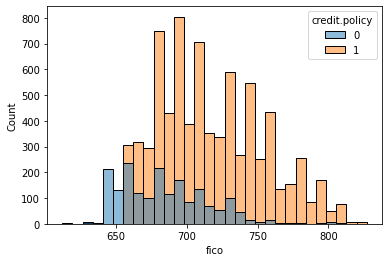

In [11]:
sns.histplot(x="fico", data=lend_data, hue="credit.policy", bins=30)

In [12]:
#observation: most of the customers with low FICO score doesn't meet the credit underwriting criteria of lending club,compared to borrowers with high fico score

<AxesSubplot:xlabel='fico', ylabel='Count'>

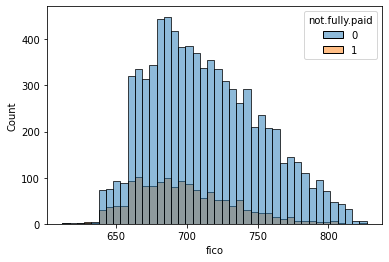

In [13]:
sns.histplot(x="fico", data=lend_data, hue="not.fully.paid")

In [14]:
#observation: customers having low FICCO score are not fully paid the loan amount 

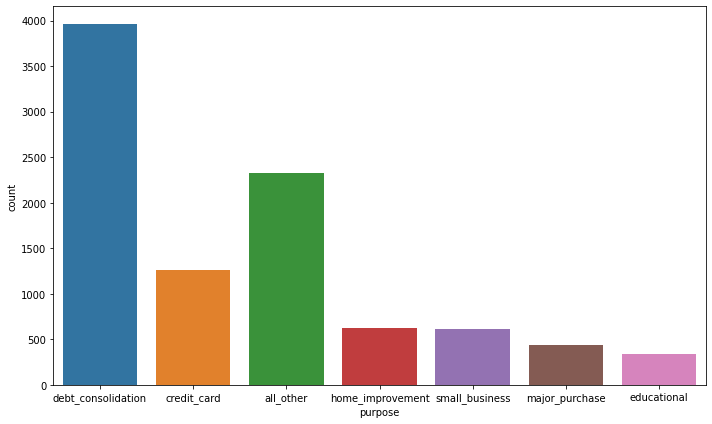

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="purpose", data=lend_data)
plt.tight_layout()

In [16]:
#observation: Most of the customers had taken  loan for the purpose of "debit_consolidation"

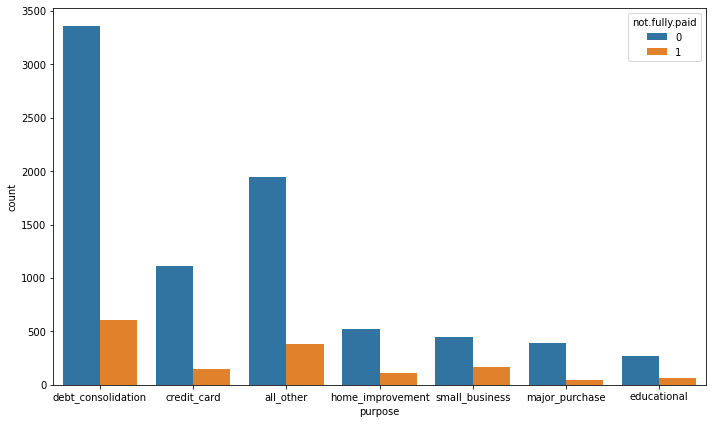

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x="purpose", data=lend_data, hue="not.fully.paid")
plt.tight_layout()

In [18]:
#Number of customers who are taken loan for the purpose of "debit_consolidation" are not fully paid compared to  compared to customers with other purposes  

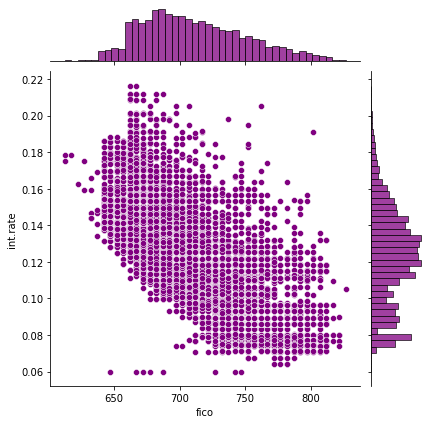

In [19]:
sns.jointplot(x='fico',y='int.rate',data=lend_data,color='purple')

In [20]:
#observation: Borrowers judged by LendingClub to be more risky are assigned higher interest rates.so from this joint plot we can analyze customers with low fico score have high interest rates.

In [21]:
#check whether data is balanced or imbalanced

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

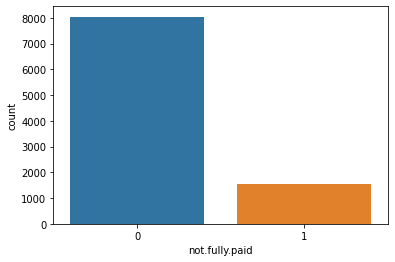

In [22]:
sns.countplot(x="not.fully.paid",data=lend_data)

In [23]:
#here the data is highly imbalanced,so we need to balance the data using oversampling.

In [24]:
X=lend_data.drop('not.fully.paid',axis=1)
Y=lend_data['not.fully.paid']


In [25]:
from imblearn.over_sampling import RandomOverSampler
over= RandomOverSampler()
x_o,y_o=over.fit_resample(X,Y)
lend_data=x_o
lend_data["not.fully.paid"]=y_o
lend_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16085,1,all_other,0.1426,41.17,8.476371,13.75,702,2580.000000,0,36.5,0,0,0,1
16086,1,all_other,0.1253,167.34,9.700147,4.85,722,1110.000000,1231,11.8,3,0,0,1
16087,0,small_business,0.1442,464.17,11.695247,23.39,682,6719.958333,107404,54.5,4,0,0,1
16088,1,home_improvement,0.1322,169.01,11.608236,15.40,692,3842.041667,53761,92.1,2,0,0,1


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

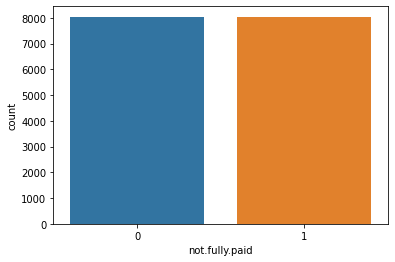

In [26]:
sns.countplot(x="not.fully.paid",data=lend_data)

In [27]:
#Now the data is balanced

In [36]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
for column in lend_data:
    if lend_data[column].dtype == 'object':
        
        lend_data[column] =le.fit_transform(lend_data[column])

lend_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16085,1,0,0.1426,41.17,8.476371,13.75,702,2580.000000,0,36.5,0,0,0,1
16086,1,0,0.1253,167.34,9.700147,4.85,722,1110.000000,1231,11.8,3,0,0,1
16087,0,6,0.1442,464.17,11.695247,23.39,682,6719.958333,107404,54.5,4,0,0,1
16088,1,4,0.1322,169.01,11.608236,15.40,692,3842.041667,53761,92.1,2,0,0,1


In [38]:
lend_data.dtypes

credit.policy          int64
purpose                int64
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [39]:
lend_data.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.018666,-0.287939,0.052370,0.017268,-0.095286,0.371662,0.098669,-0.183922,-0.099898,-0.545701,-0.062588,-0.059509,-0.195903
purpose,0.018666,1.000000,0.144260,0.209017,0.126805,-0.041996,0.070267,0.059839,0.065315,-0.065367,0.047528,0.004656,0.013623,0.052312
int.rate,-0.287939,0.144260,1.000000,0.276696,0.082934,0.206603,-0.678036,-0.109017,0.081971,0.413911,0.185724,0.153800,0.100208,0.215339
installment,0.052370,0.209017,0.276696,1.000000,0.476470,0.023514,0.112863,0.183502,0.246799,0.052854,-0.005798,-0.002649,-0.025472,0.062066
log.annual.inc,0.017268,0.126805,0.082934,0.476470,1.000000,-0.031705,0.109289,0.345304,0.379355,0.081190,0.041399,0.015317,0.018621,-0.043549
dti,-0.095286,-0.041996,0.206603,0.023514,-0.031705,1.000000,-0.226542,0.093009,0.166321,0.330541,0.029678,-0.039644,0.027989,0.052759
fico,0.371662,0.070267,-0.678036,0.112863,0.109289,-0.226542,1.000000,0.260525,0.006509,-0.493674,-0.187534,-0.208786,-0.154825,-0.210772
days.with.cr.line,0.098669,0.059839,-0.109017,0.183502,0.345304,0.093009,0.260525,1.000000,0.254353,0.020762,-0.020311,0.078791,0.073275,-0.035797
revol.bal,-0.183922,0.065315,0.081971,0.246799,0.379355,0.166321,0.006509,0.254353,1.000000,0.167454,0.041696,-0.032027,-0.036580,0.060732
revol.util,-0.099898,-0.065367,0.413911,0.052854,0.081190,0.330541,-0.493674,0.020762,0.167454,1.000000,-0.020753,-0.054819,0.072387,0.121390


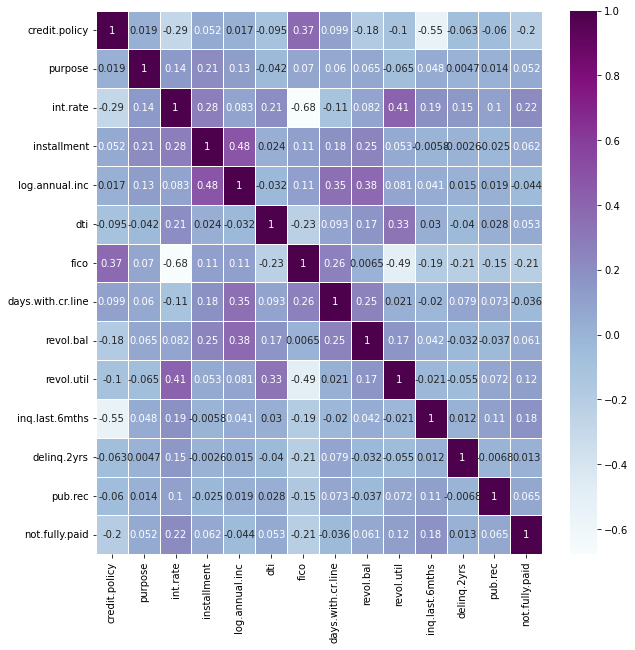

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(lend_data.corr() ,cmap ='BuPu',cbar=True,annot=True,linewidths=.5)
plt.show()

In [41]:
#no two features are highly correlated so we can't drop any features.

In [42]:
X=lend_data.drop('not.fully.paid',axis=1)
Y=lend_data['not.fully.paid']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=12345)

In [45]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((12872, 13), (3218, 13), (12872,), (3218,))

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaling=MinMaxScaler()

In [48]:
scaled_train=scaling.fit_transform(X_train)

In [49]:
print(scaled_train.shape)

(12872, 13)


In [50]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [51]:
model = Sequential()
model.add(Dense(80, input_dim=13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [53]:
model.fit(scaled_train,Y_train,epochs=500)

Epoch 1/500
403/403 [==============================] - 6s 1ms/step - loss: 0.6581 - accuracy: 0.6025
Epoch 2/500
403/403 [==============================] - 1s 1ms/step - loss: 0.6473 - accuracy: 0.6158
Epoch 3/500
403/403 [==============================] - 1s 1ms/step - loss: 0.6413 - accuracy: 0.6254
Epoch 4/500
403/403 [==============================] - 1s 1ms/step - loss: 0.6371 - accuracy: 0.6255
Epoch 5/500
403/403 [==============================] - 1s 1ms/step - loss: 0.6356 - accuracy: 0.6293
Epoch 6/500
403/403 [==============================] - 1s 1ms/step - loss: 0.6319 - accuracy: 0.6330
Epoch 7/500
403/403 [==============================] - 1s 1ms/step - loss: 0.6306 - accuracy: 0.6395
Epoch 8/500
403/403 [==============================] - 1s 1ms/step - loss: 0.6275 - accuracy: 0.6378
Epoch 9/500
403/403 [==============================] - 1s 1ms/step - loss: 0.6261 - accuracy: 0.6375
Epoch 10/500
403/403 [==============================] - 1s 1ms/step - loss: 0.6253 - accura

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1120      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [55]:
scaled_test=scaling.transform(X_test)

In [56]:
test_loss, test_acc = model.evaluate(scaled_test,Y_test)

101/101 [==============================] - 0s 916us/step - loss: 0.4512 - accuracy: 0.7933


In [57]:
y_pred=model.predict(scaled_test)
print([round(scaled_test[0]) for scaled_test in y_pred])



[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 

In [58]:
# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [59]:
print(classification_report(Y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1574
           1       0.79      0.81      0.80      1644

    accuracy                           0.79      3218
   macro avg       0.79      0.79      0.79      3218
weighted avg       0.79      0.79      0.79      3218

